In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from imblearn.combine import SMOTETomek

In [2]:
df1=pd.read_csv("x_train.csv")
df2=pd.read_csv("x_test.csv")

In [3]:
df1.describe()

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,ID,target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,6.682000,29293.666667,11.532000,36.014667,0.429333,1.685333,32558.000000,1.114667,0.600667,858.402667,0.114000
std,3.555461,28222.294825,6.479684,13.061860,0.495146,0.699508,21190.516621,1.005083,0.489925,500.323485,0.317917
min,1.000000,5000.000000,3.000000,18.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,13000.000000,6.000000,26.000000,0.000000,2.000000,21000.000000,0.000000,0.000000,419.750000,0.000000
50%,7.000000,21500.000000,12.000000,32.000000,0.000000,2.000000,27000.000000,1.000000,1.000000,857.500000,0.000000
75%,10.000000,34000.000000,12.000000,44.000000,1.000000,2.000000,37000.000000,2.000000,1.000000,1294.250000,0.000000
max,12.000000,301000.000000,36.000000,90.000000,1.000000,2.000000,401000.000000,4.000000,1.000000,1723.000000,1.000000


In [4]:
df1['target'].value_counts()
# Imbalanced Target variable

0    1329
1     171
Name: target, dtype: int64

In [5]:
df1.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,ID,target
0,11,27000,6,61,female,Secondary special education,Clothing,0,2,21000,Another,0,0,1506,0
1,2,34000,6,41,female,Secondary special education,Cell phones,1,2,26000,Married,1,1,157,1
2,5,28000,12,59,male,Secondary special education,Construction Materials,1,2,16000,Another,1,0,607,0
3,5,10000,6,23,female,Secondary special education,Household appliances,1,2,76000,Another,0,1,636,0
4,7,8000,6,31,female,Secondary special education,Household appliances,0,2,31000,Another,1,1,857,0


#### Null Check

In [6]:
print(df1.isnull().sum().sum())
print(df2.isnull().sum().sum())
# no null values

0
0


#### Duplicates

In [7]:
print(df1.shape,df2.shape)

df1 = df1.drop_duplicates(keep='first')

df2 = df2.drop_duplicates(keep='first')
print(df1.shape,df2.shape)
# No duplicates

(1500, 15) (223, 14)
(1500, 15) (223, 14)


In [8]:
df1.head(2)

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,ID,target
0,11,27000,6,61,female,Secondary special education,Clothing,0,2,21000,Another,0,0,1506,0
1,2,34000,6,41,female,Secondary special education,Cell phones,1,2,26000,Married,1,1,157,1


In [9]:
df1[df1['target']==1].groupby('family_status').mean()['credit_term']

family_status
Another      13.137615
Married      11.698113
Unmarried    16.666667
Name: credit_term, dtype: float64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1500 non-null   int64 
 1   credit_amount        1500 non-null   int64 
 2   credit_term          1500 non-null   int64 
 3   age                  1500 non-null   int64 
 4   sex                  1500 non-null   object
 5   education            1500 non-null   object
 6   product_type         1500 non-null   object
 7   having_children_flg  1500 non-null   int64 
 8   region               1500 non-null   int64 
 9   income               1500 non-null   int64 
 10  family_status        1500 non-null   object
 11  phone_operator       1500 non-null   int64 
 12  is_client            1500 non-null   int64 
 13  ID                   1500 non-null   int64 
 14  target               1500 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 187.5+ KB


In [11]:
df1.describe()

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,ID,target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,6.682000,29293.666667,11.532000,36.014667,0.429333,1.685333,32558.000000,1.114667,0.600667,858.402667,0.114000
std,3.555461,28222.294825,6.479684,13.061860,0.495146,0.699508,21190.516621,1.005083,0.489925,500.323485,0.317917
min,1.000000,5000.000000,3.000000,18.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,13000.000000,6.000000,26.000000,0.000000,2.000000,21000.000000,0.000000,0.000000,419.750000,0.000000
50%,7.000000,21500.000000,12.000000,32.000000,0.000000,2.000000,27000.000000,1.000000,1.000000,857.500000,0.000000
75%,10.000000,34000.000000,12.000000,44.000000,1.000000,2.000000,37000.000000,2.000000,1.000000,1294.250000,0.000000
max,12.000000,301000.000000,36.000000,90.000000,1.000000,2.000000,401000.000000,4.000000,1.000000,1723.000000,1.000000


#### Correlation check 

<AxesSubplot:>

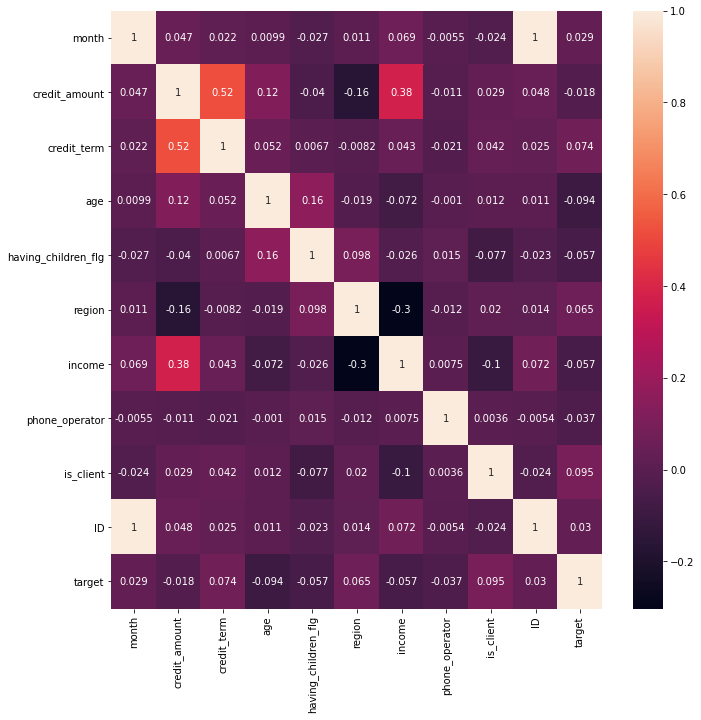

In [12]:
corrmat = df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

In [13]:
# month is correlated with ID
df1.drop('month',1,inplace=True)

In [14]:
df1.head(2)

,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,ID,target
0,27000,6,61,female,Secondary special education,Clothing,0,2,21000,Another,0,0,1506,0
1,34000,6,41,female,Secondary special education,Cell phones,1,2,26000,Married,1,1,157,1


#### Categorical variable change 

In [15]:
for i in df1:
    if df1[i].dtypes=='int64':
        pass
    else:
        df1[i]=df1[i].astype('category').cat.codes
for i in df2:
    if df2[i].dtypes=='int64':
        pass
    else:
        df2[i]=df2[i].astype('category').cat.codes
    

In [16]:
df2.head(2)

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,ID
0,2,38000,18,22,1,4,8,1,2,16000,0,3,1,155
1,6,51000,12,48,1,0,8,0,2,32000,0,1,1,723


In [17]:
#df1[df1['target']==0].credit_term.value_counts()

In [18]:
df1[df1['target']==1].groupby('family_status').mean()['credit_term']

family_status
0    13.137615
1    11.698113
2    16.666667
Name: credit_term, dtype: float64

In [19]:
df1['credit_value'] = np.where(df1['credit_term']>13, 1, 0)
df2['credit_value'] = np.where(df2['credit_term']>13, 1, 0)
df1.head()

,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,ID,target,credit_value
0,27000,6,61,0,5,5,0,2,21000,0,0,0,1506,0,0
1,34000,6,41,0,5,3,1,2,26000,1,1,1,157,1,0
2,28000,12,59,1,5,7,1,2,16000,0,1,0,607,0,0
3,10000,6,23,0,5,13,1,2,76000,0,0,1,636,0,0
4,8000,6,31,0,5,13,0,2,31000,0,1,1,857,0,0


In [20]:
df2.head(2)

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,ID,credit_value
0,2,38000,18,22,1,4,8,1,2,16000,0,3,1,155,1
1,6,51000,12,48,1,0,8,0,2,32000,0,1,1,723,0


In [21]:
df1[df1['target']==0].groupby('is_client').mean()

,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,ID,target,credit_value
is_client,,,,,,,,,,,,,,
0,28677.215190,11.083183,35.981917,0.578662,2.802893,9.077758,0.484629,1.661844,35764.918626,0.354430,1.112116,867.824593,0.0,0.197107
1,30051.546392,11.555412,36.795103,0.543814,2.936856,8.747423,0.407216,1.673969,31014.175258,0.341495,1.139175,842.556701,0.0,0.201031


In [22]:
df1[df1['target']==0]['age'].value_counts()

23    67
24    61
31    55
26    53
27    53
      ..
70     1
77     1
71     1
69     1
90     1
Name: age, Length: 63, dtype: int64

<AxesSubplot:>

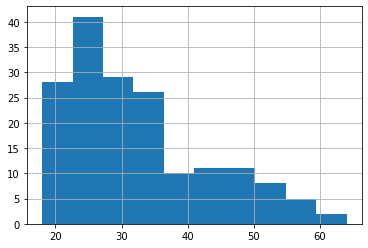

In [23]:
df1[df1['target']==1].age.hist()

<AxesSubplot:>

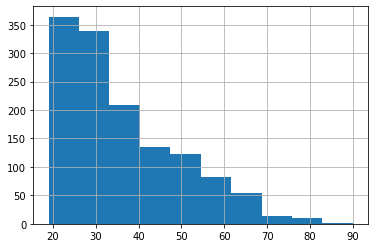

In [24]:
df1[df1['target']==0].age.hist()

<AxesSubplot:>

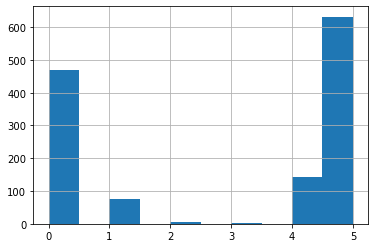

In [25]:
df1[df1['target']==0].education.hist()

In [26]:
a=df1['target'].copy()
df1.drop('target',1,inplace=True)
df1['target']=a.copy()


<AxesSubplot:>

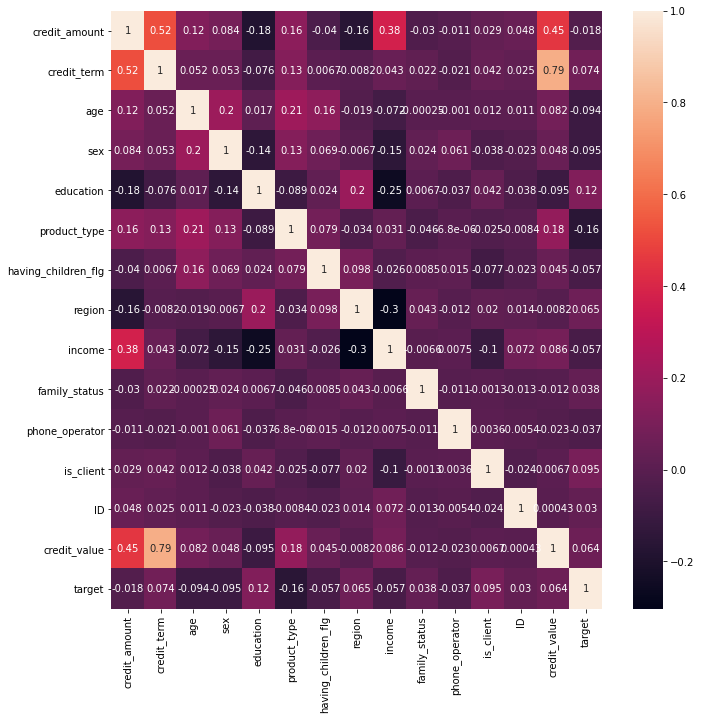

In [27]:
corrmat = df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

In [28]:
df2.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,ID,credit_value
0,2,38000,18,22,1,4,8,1,2,16000,0,3,1,155,1
1,6,51000,12,48,1,0,8,0,2,32000,0,1,1,723,0
2,1,10000,11,42,1,4,9,1,2,21000,1,0,1,21,0
3,11,8000,4,24,1,4,2,1,2,26000,0,1,0,1495,0
4,3,14500,12,23,0,4,2,0,2,21000,0,0,1,283,0


### Test Train Split 

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1[df1.columns[:-1]],df1[df1.columns[-1]],train_size=0.8,random_state=50)

#### Feature Selection 

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

In [31]:
#raw scores using univariate selection
print(featureScores.nlargest(8,'Score'))  #print 5 best features

          Feature         Score
0   credit_amount  49476.751182
8          income  34920.391919
12             ID    302.889046
5    product_type     83.530782
2             age     48.429443
4       education     35.650138
1     credit_term     15.248776
3             sex      7.242519


In [32]:
X_train.columns

Index(['credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having_children_flg', 'region', 'income',
       'family_status', 'phone_operator', 'is_client', 'ID', 'credit_value'],
      dtype='object')

In [33]:
from sklearn.feature_selection import RFE
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=7, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())

[ True  True  True False False  True False False  True False  True False
  True False]


In [34]:
X_train.head(2)

,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,ID,credit_value
922,29500,12,35,0,4,3,0,2,26000,0,0,1,97,0
1200,18000,6,56,0,4,3,0,2,36000,2,1,0,38,0


In [35]:
l=['credit_amount','credit_term','sex','education','age','product_type','income','credit_value']
X_train=X_train[l]
X_test=X_test[l]

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [37]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[259   0]
 [ 41   0]]
0.8633333333333333
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       259
           1       0.00      0.00      0.00        41

    accuracy                           0.86       300
   macro avg       0.43      0.50      0.46       300
weighted avg       0.75      0.86      0.80       300



C:\Users\abhinandan.sen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
class_weight=dict({0:1,1:55})
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[257   2]
 [ 39   2]]
0.8633333333333333
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       259
           1       0.50      0.05      0.09        41

    accuracy                           0.86       300
   macro avg       0.68      0.52      0.51       300
weighted avg       0.82      0.86      0.81       300



## under sampling 

In [39]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 1070, 1: 130})
The number of classes after fit Counter({0: 162, 1: 130})


C:\Users\abhinandan.sen\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[124 135]
 [ 11  30]]
0.5133333333333333
              precision    recall  f1-score   support

           0       0.92      0.48      0.63       259
           1       0.18      0.73      0.29        41

    accuracy                           0.51       300
   macro avg       0.55      0.61      0.46       300
weighted avg       0.82      0.51      0.58       300



## Over Sampling 

In [41]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 1070, 1: 130})
The number of classes after fit Counter({0: 1070, 1: 802})


C:\Users\abhinandan.sen\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[249  10]
 [ 36   5]]
0.8466666666666667
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       259
           1       0.33      0.12      0.18        41

    accuracy                           0.85       300
   macro avg       0.60      0.54      0.55       300
weighted avg       0.80      0.85      0.81       300



#### SMOTETomek and Random Forest Classifier

In [43]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 1070, 1: 130})
The number of classes after fit Counter({0: 949, 1: 681})


C:\Users\abhinandan.sen\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,class_weight='balanced')
classifier.fit(X_train_ns,y_train_ns)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[242  17]
 [ 36   5]]
0.8233333333333334
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       259
           1       0.23      0.12      0.16        41

    accuracy                           0.82       300
   macro avg       0.55      0.53      0.53       300
weighted avg       0.78      0.82      0.80       300



In [45]:
#smote

os=SMOTETomek(.60)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 1070, 1: 130})
The number of classes after fit Counter({0: 962, 1: 534})


C:\Users\abhinandan.sen\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.6 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


### SVM 

In [60]:
from sklearn import svm
clf = svm.SVC(gamma='scale', class_weight=dict({0:1,1:1.665}))
clf.fit(X_train_ns, y_train_ns)  
prclf = clf.predict(X_test)
print(confusion_matrix(y_test,prclf))
print(accuracy_score(y_test,prclf))
print(classification_report(y_test,prclf))

[[174  85]
 [ 17  24]]
0.66
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       259
           1       0.22      0.59      0.32        41

    accuracy                           0.66       300
   macro avg       0.57      0.63      0.55       300
weighted avg       0.82      0.66      0.71       300



### xgboost 

In [64]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.001,verbosity=0)
xgb_model.fit(X_train_ns, y_train_ns)

print("Accuracy on training set: {:.3f}".format(xgb_model.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(xgb_model.score(X_test, y_test)))
xgb_predict=xgb_model.predict(X_test)
print(confusion_matrix(y_test,xgb_predict))
print(accuracy_score(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

Accuracy on training set: 0.828
Accuracy on validation set: 0.743
[[211  48]
 [ 29  12]]
0.7433333333333333
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       259
           1       0.20      0.29      0.24        41

    accuracy                           0.74       300
   macro avg       0.54      0.55      0.54       300
weighted avg       0.79      0.74      0.76       300



## Although Random Forest is giving a higher Mean F1 Score, It is better to use SVM for this case as Recall is important for minority classes

In [59]:
y_pred = clf.predict(df2[l])
out=pd.DataFrame({'ID': df2['ID'], 'Expected': y_pred})
out


,ID,Expected
0,155,1
1,723,1
2,21,0
3,1495,0
4,283,0
...,...,...
218,1577,0
219,1325,0
220,229,0
221,1326,1


In [ ]:
#out.to_csv('out.csv',index=False)

In [ ]:
out['Expected'].value_counts()